In [152]:
import numpy as np
import time
import networkx as nx
import random
import matplotlib.pyplot as plt

NODES = 100
EDGES = 500
MAX_WEIGHT = 30
MIN_WEIGHT = 1

# Undirected graph

## Adjacency matrix

In [153]:
g=nx.gnm_random_graph(NODES, EDGES)

for (u,v,w) in g.edges(data=True):
    w['weight'] = random.randint(MIN_WEIGHT, MAX_WEIGHT)

In [154]:
adjacency_matrix = nx.adjacency_matrix(g).todense()
adjacency_matrix[0: 2]

C:\Users\Алексей\AppData\Local\Temp\ipykernel_10296\2109761698.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjacency_matrix = nx.adjacency_matrix(g).todense()


matrix([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  6,  0,  0,  0,  6,  0,  0,  0,  0,  0, 18,  0,
          0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0, 22, 14,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
          0,  0,  0,  0],
        [ 0,  0,  0,  0, 11, 30,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 25,  0,  0, 14,  0,
          0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0, 26,  0, 11,  0,  0,  0,  0,  0,  0,  1,  0,  0, 20,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0, 16,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0]], dtype=int32)

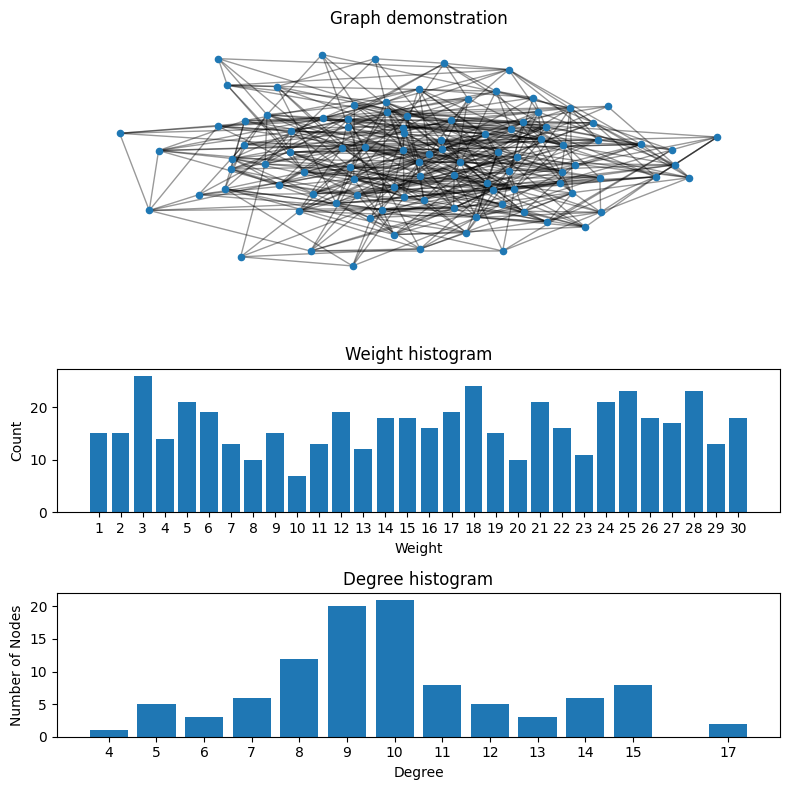

In [155]:
degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
weight = np.unique(np.array([w['weight'] for (u, v, w) in g.edges(data=True)]), return_counts=True)

fig = plt.figure(figsize=(8, 8))

axgrid = fig.add_gridspec(7, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
pos = nx.spring_layout(g, seed=22)
nx.draw_networkx_nodes(g, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(g, pos, ax=ax0, alpha=0.4)
ax0.set_title("Graph demonstration")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:5, :])
ax1.bar(x=weight[0], height=weight[1], tick_label=weight[0])
ax1.set_title("Weight histogram")
ax1.set_ylabel("Count")
ax1.set_xlabel("Weight")

values = np.unique(degree_sequence, return_counts=True)
ax2 = fig.add_subplot(axgrid[5:, :])
ax2.bar(x=values[0], height=values[1], tick_label=values[0])
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("Number of Nodes")

fig.tight_layout()
plt.savefig("./figures/graph.png")
plt.show()

## Algorithms

In [164]:
START_NODE = random.randint(0, NODES)
print(f'start node - {START_NODE}')

start node - 20


In [161]:
from tqdm.notebook import tqdm_notebook
def test_algorithm(graph, start_node, n, algorithm):
    results = {}
    for node in tqdm_notebook(graph.nodes):
        if node != start_node:
            eval_times = []
            for i in range(n):
                start = time.perf_counter_ns()
                path = algorithm(graph, start_node, node)
                eval_times.append(time.perf_counter_ns() - start)
                #print(path)
            avg_time = sum(eval_times) / len(eval_times)
            if len(path) not in results:
                results[len(path)] = []
            results[len(path)].append(avg_time)
    return results

In [165]:
dijkstra_results = test_algorithm(g, START_NODE, 10, nx.dijkstra_path)
bellman_ford_results = test_algorithm(g, START_NODE, 10, nx.bellman_ford_path)
astar_results = test_algorithm(g, START_NODE, 10, nx.astar_path)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

## Comparison

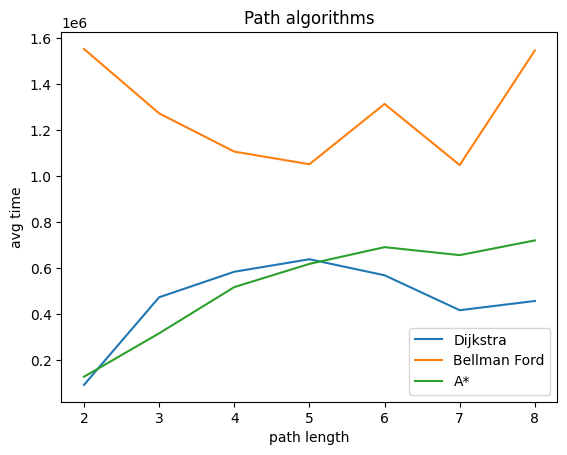

In [166]:
plt.title("Path algorithms")
plt.plot(
    [path_len for path_len in sorted(dijkstra_results)],
    [sum(dijkstra_results[path_len]) / len(dijkstra_results[path_len]) for path_len in sorted(dijkstra_results)],
    label="Dijkstra"
)
plt.plot(
    [path_len for path_len in sorted(bellman_ford_results)],
    [sum(bellman_ford_results[path_len]) / len(bellman_ford_results[path_len])
     for path_len in sorted(bellman_ford_results)],
    label="Bellman Ford"
)
plt.plot(
    [path_len for path_len in sorted(astar_results)],
    [sum(astar_results[path_len]) / len(astar_results[path_len])
     for path_len in sorted(astar_results)],
    label="A*"
)
plt.xlabel("path length")
plt.ylabel("avg time")
plt.legend()
plt.savefig("./figures/algorithms_comparison.png")
plt.show()

# Cell grid

In [167]:
HEIGHT = 10
WIDTH = 20
OBSTACLE_COUNT = 40

In [177]:
remove_nodes = set()
while len(remove_nodes) < OBSTACLE_COUNT:
    remove_nodes.add((random.randint(0, HEIGHT), random.randint(0, WIDTH)))

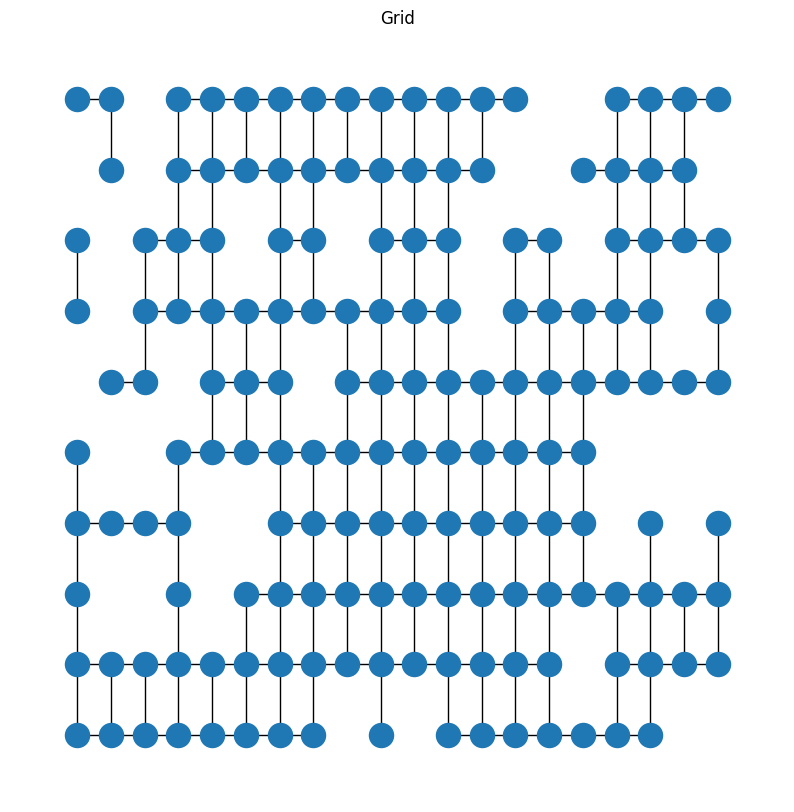

In [203]:
grid = nx.grid_2d_graph(HEIGHT, WIDTH)
grid.remove_nodes_from(remove_nodes)
pos = {(x, y): (y, -x) for x, y in grid.nodes()}

fig = plt.figure(figsize=(10, 10))

axgrid = fig.add_gridspec(1, 1)
ax = fig.add_subplot(axgrid[:, :])
ax.set_title("Grid")
nx.draw(grid,pos=pos, ax=ax)
plt.savefig("./figures/grid.png")


In [220]:
start = random.randint(0, len(grid.nodes))
end = random.randint(0, len(grid.nodes))
print(f'Path {start} -> {end}')
nodes_list = list(grid.nodes)
grid_path = nx.astar_path(grid, nodes_list[start], nodes_list[end])
print(grid_path)

Path 4 -> 75
[(0, 5), (1, 5), (1, 6), (2, 6), (3, 6), (3, 7), (3, 8), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14)]


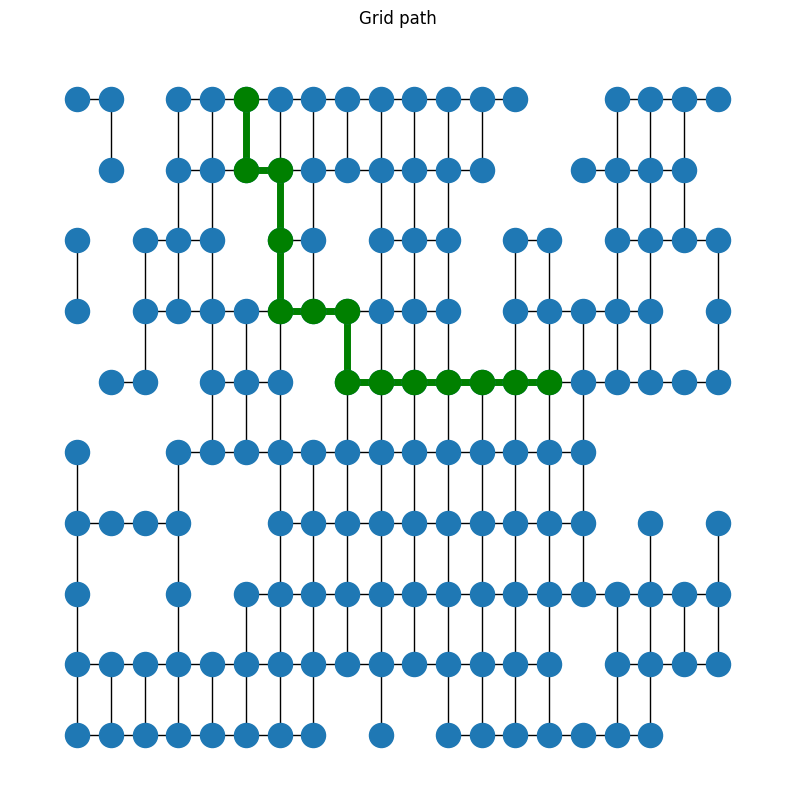

In [232]:
fig = plt.figure(figsize=(10, 10))

axgrid = fig.add_gridspec(1, 1)
ax = fig.add_subplot(axgrid[:, :])
ax.set_title("Grid path")
nx.draw(grid, pos=pos, ax=ax)
nx.draw_networkx_edges(
    grid,
    pos,
    edgelist=list(zip(grid_path, grid_path[1:])),
    edge_color="g",
    width=5
)
nx.draw_networkx_nodes(
    grid,
    pos,
    nodelist=grid_path,
    node_color='g'
)
plt.savefig("./figures/grid_path.png")

In [240]:
time_list = []
paths = []

for i in range(0, 5):
    start = random.randint(0, len(grid.nodes))
    end = random.randint(0, len(grid.nodes))

    start_time = time.perf_counter_ns()
    paths.append(nx.astar_path(grid, nodes_list[start], nodes_list[end]))
    time_list.append(time.perf_counter_ns() - start_time)

print(f'AVG time of evaluating {sum(time_list) / len(time_list)}')

AVG time of evaluating 686660.0


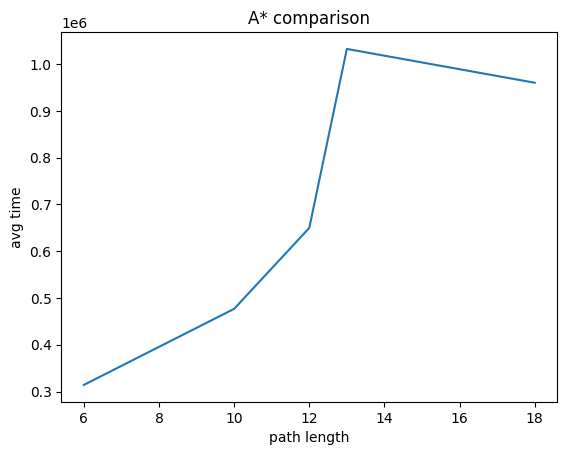

In [246]:
result = {}
for eval_time, path in zip(time_list, paths):
    if len(path) not in result:
        result[len(path)] = []
    result[len(path)].append(eval_time)

for path_len in result:
    result[path_len] = sum(result[path_len]) / len(result[path_len])

plt.title("A* comparison")
plt.plot(
    [path_len for path_len in sorted(result)],
    [result[path_len] for path_len in sorted(result)],
)
plt.xlabel("path length")
plt.ylabel("avg time")
plt.savefig("./figures/grid_search_comparison.png")
plt.show()